Import required libraries

In [1]:
# to work with the file system and folder structure
import os
import time
import glob
import pathlib

import numpy as np # to work with arrays
import pandas as pd # to work with dataframes
import matplotlib.pyplot as plt # to plot graphs for data and accuracy
import seaborn as sns # to plot graphs for data and accuracy

Check categories of news articles available

In [2]:
os.listdir('/kaggle/input/bbc-news-summary/BBC News Summary/Summaries/')

['politics', 'sport', 'tech', 'entertainment', 'business']

Defining paths for variables for articles and summaries along with setting a list for categories of news articles

In [3]:
# Now we define paths for articles, summaries and maintain a list of categories of our data
article_path = '/kaggle/input/bbc-news-summary/BBC News Summary/News Articles'
summary_path = '/kaggle/input/bbc-news-summary/BBC News Summary/Summaries'
categories_list = ['politics', 'sport', 'tech', 'entertainment', 'business']

**purpose of the function** : to read into the folders and store articles, summaries and categories into variables.

In [4]:
# providing inputs for articles, summaries and categories
def read_in_folders(article_path, summary_path, categories_list, encoding = "ISO-8859-1"):
    articles = []
    summaries = []
    categories = []
    
    
    for category in categories_list: # category iterates over the entire list of categories one by one
        
        # store all articles & summaries in the variables respectively for a given category, recursively
        # therefore, essentially it make a list for all artivles and summaries per category, in the end it stores it for all categories
        article_paths = glob.glob(os.path.join(article_path, category, '*.txt'), recursive=True)
        summary_paths = glob.glob(os.path.join(summary_path, category, '*.txt'), recursive=True)
        
        print(f'found {len(article_paths)} in articles/{category} folder, {len(summary_paths)} in summaries/{category}')
        
        # check if number of articles & summaries are same or not
        if(len(article_paths) != len(summary_paths)):
            print('Both are not equal')
            return 
        
        # put the content of all articles per category in articles
        for index in range(len(article_paths)):
            categories.append(category)
            with open(article_paths[index], mode = 'r', encoding = encoding) as file:
                articles.append(file.read())
                
            with open(summary_paths[index], mode = 'r', encoding = encoding) as file:
                summaries.append(file.read())
                
    return articles, summaries, categories

In [5]:
#store the return values into the variables
articles, summaries, categories = read_in_folders(article_path, summary_path, categories_list)

found 417 in articles/politics folder, 417 in summaries/politics
found 511 in articles/sport folder, 511 in summaries/sport
found 401 in articles/tech folder, 401 in summaries/tech
found 386 in articles/entertainment folder, 386 in summaries/entertainment
found 510 in articles/business folder, 510 in summaries/business


Create a dataframe to work with the data

In [6]:
#creates the dataframe df with articles, summaries and categories storeed in key value pairs
df = pd.DataFrame({'articles':articles, 'summaries':summaries, 'categories': categories},)
df


,articles,summaries,categories
0,Budget to set scene for election\n\nGordon Bro...,- Increase in the stamp duty threshold from Â£...,politics
1,Army chiefs in regiments decision\n\nMilitary ...,"""They are very much not for the good and will ...",politics
2,Howard denies split over ID cards\n\nMichael H...,Michael Howard has denied his shadow cabinet w...,politics
3,Observers to monitor UK election\n\nMinisters ...,The report said individual registration should...,politics
4,Kilroy names election seat target\n\nEx-chat s...,"UKIP's leader, Roger Knapman, has said he is g...",politics
...,...,...,...
2220,India opens skies to competition\n\nIndia will...,India will allow domestic commercial airlines ...,business
2221,Yukos bankruptcy 'not US matter'\n\nRussian au...,Yukos says a US court was entitled to declare ...,business
2222,Survey confirms property slowdown\n\nGovernmen...,House prices were 11.8% higher on the year in ...,business
2223,High fuel prices hit BA's profits\n\nBritish A...,"Rod Eddington, BA's chief executive, said the ...",business


In [7]:
df['categories'].head()

0    politics
1    politics
2    politics
3    politics
4    politics
Name: categories, dtype: object

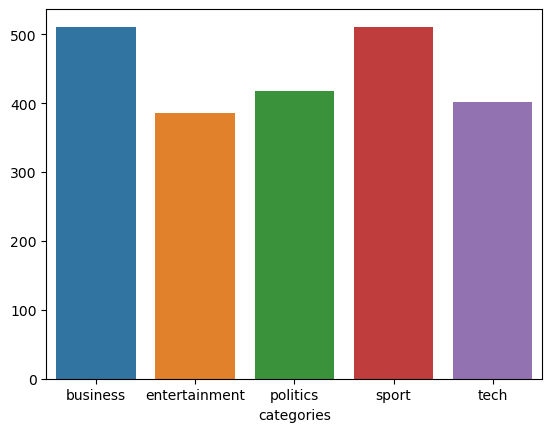

In [8]:
# group sizes by the various categories 
categ_sizes = df.groupby('categories').size() 
sns.barplot(x=categ_sizes.index, y=categ_sizes) # indexes are the different categories
plt.show()

Caclulating the number of words in each article & summary

In [9]:
# apply adds allows us to apply the lambda function and store output in the new columns into the dataframe
# x is each article, x.split() split each word in x and len returns the final number of words
df['article_len'] = df['articles'].apply(lambda x : len(x.split())) 
df['summary_len'] = df['summaries'].apply(lambda x : len(x.split()))


In [10]:
df

,articles,summaries,categories,article_len,summary_len
0,Budget to set scene for election\n\nGordon Bro...,- Increase in the stamp duty threshold from Â£...,politics,538,192
1,Army chiefs in regiments decision\n\nMilitary ...,"""They are very much not for the good and will ...",politics,500,266
2,Howard denies split over ID cards\n\nMichael H...,Michael Howard has denied his shadow cabinet w...,politics,540,225
3,Observers to monitor UK election\n\nMinisters ...,The report said individual registration should...,politics,496,223
4,Kilroy names election seat target\n\nEx-chat s...,"UKIP's leader, Roger Knapman, has said he is g...",politics,440,185
...,...,...,...,...,...
2220,India opens skies to competition\n\nIndia will...,India will allow domestic commercial airlines ...,business,225,90
2221,Yukos bankruptcy 'not US matter'\n\nRussian au...,Yukos says a US court was entitled to declare ...,business,398,180
2222,Survey confirms property slowdown\n\nGovernmen...,House prices were 11.8% higher on the year in ...,business,322,120
2223,High fuel prices hit BA's profits\n\nBritish A...,"Rod Eddington, BA's chief executive, said the ...",business,406,197


In [11]:
# 0 means x axis\
# check mean length of all articles per category
category_wise_len = df.groupby('categories', 0).agg({'article_len': 'mean', 'summary_len': 'mean'})
category_wise_len

,article_len,summary_len
categories,,
business,328.880392,139.929412
entertainment,330.621762,144.049223
politics,453.973621,195.709832
sport,329.262231,143.187867
tech,502.695761,213.837905


In [12]:
!nvidia-smi

Fri Apr  7 21:57:16 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [13]:
!pip install --quiet transformers==4.5.0
!pip install --quiet pytorch-lightning==1.2.7